In [13]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [14]:
datos = pd.read_csv("datos_procesados.csv")
# Cabeceras
print(datos.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  <1H OCEAN  \
0       322.0       126.0         8.3252            452600.0          0   
1      2401.0      1138.0         8.3014            358500.0          0   
2       496.0       177.0         7.2574            352100.0          0   
3       558.0       219.0         5.6431            341300.0          0   
4       565.0       259.0         3.8462            342200.0          0   

   INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0       0       0         1           0  
1       0     

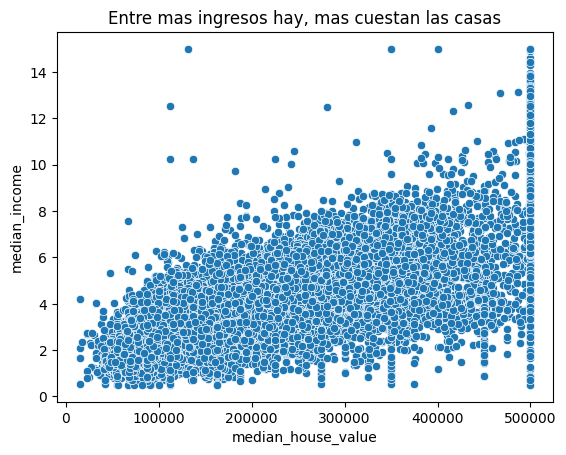

In [15]:
sb.scatterplot(x=datos["median_house_value"],y=datos["median_income"],data=datos)
plt.title("Entre mas ingresos hay, mas cuestan las casas")
plt.show()

In [16]:
# Separar las caracteristicas de las etiquetas
X = datos.drop(["median_house_value"],axis=1)
y = datos["median_house_value"]

In [17]:
# Separar los datos en 2 partes:  
# • Un conjunto de entrenamiento para ajustar y mejorar
# • Y uno de pruebas con datos que no conoce del entrenamiento para probarlo y ver si efectivamente aprendio
from sklearn.model_selection import train_test_split

In [18]:
# Funcion que nos va a separar los datos
# test_size -> Cuanto queremos separar para pruebas (.2 es un 20%)
X_entrenamiento,X_pruebas,y_entrenamiento,y_pruebas = train_test_split(X,y,test_size=.2)
print(X_entrenamiento.shape)
print(y_entrenamiento.shape)
print(X_pruebas.shape)
print(y_pruebas.shape)

# X_entrenamiento.shape -> (16346 registros, 13 columnas)
# y_entrenamiento.shape -> (16346 registros, 1 columnas)
# X_pruebas -> (4087 registros, 13 columnas)
# y_pruebas -> (4087 registros, 1 columnas)

(16346, 13)
(16346,)
(4087, 13)
(4087,)


In [20]:
# Crear modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
# Entrenar modelo
modelo.fit(X_entrenamiento,y_entrenamiento)

LinearRegression()

In [21]:
# Generar predicciones con los datos de pruebas y comparar estas predicciones con los valores reales de estos datos de pruebas
predicciones = modelo.predict(X_pruebas)
comparativa = {"Prediccion": predicciones,"Valor Real": y_pruebas}
dataFrame = pd.DataFrame(comparativa)
print(dataFrame)
# Arroja resultados inconsistentes. Algunas predicciones se aproximan muy bien al valor real, pero otras predicciones estan muy lejos del valor real
# Esto ocurre porque existen muchos datos y la linea de regresion lineal batalla por adaptarse
# Algunas veces el modelo funciona muy bien con los datos de entrenamiento pero muy mal con los de pruebas (overfitting o sobreajuste), y significa
# que se aprende mucho los datos de entrenamiento, pero luego con los datos de prueba que nunca ha visto le va muy mal

          Prediccion  Valor Real
3051   104890.668089     72500.0
8724   470996.371620    500001.0
13196  108908.849842    110400.0
7928   241278.101592    225200.0
9905   181759.737545    361900.0
...              ...         ...
11655  115477.649672     86300.0
6185   153829.533963    157300.0
17685  448009.720942    500001.0
2478    94303.972150    112500.0
1746   239939.648711    144600.0

[4087 rows x 2 columns]


In [22]:
# Sobreajuste o Overfitting
print(modelo.score(X_entrenamiento,y_entrenamiento))
print(modelo.score(X_pruebas,y_pruebas))
# Estan bastante cerca por lo que no estan sufriendo de un sobreajuste considerable

0.6463781939664179
0.6465630791408518


In [25]:
# Error
# mean_squared_error -> Es una función de pérdida de regresión por error cuadrático medio. Esta función se utiliza
# para medir la diferencia entre los valores reales y los valores predichos en un modelo de regresión
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_pruebas,predicciones)
print("Error cuadratico medio:")
print(mse)
# Es un error bastante considerable debido a que toma todas las diferencias y las eleva al cuadrado

Error cuadratico medio:
4704714603.353955


In [26]:
# Obtenemos su raiz cuadrada
rmse = np.sqrt(mse)
print("Raiz del Error cuadratico medio:")
print(rmse)
# Esto es un promedio cuanto estamos fallando al calcular el precio de todas las casas

Raiz del Error cuadratico medio:
68590.92216433567






In [33]:
# Escalamiento (Scaler)
# • La antiguedad de la casa (housing_median_ag) va de 1 a 52
# • La poblacion (population) va de 3 a 35682

# El problema es que cuando estamos entrenando un modelo numerico muy probablemente va a darle 
# mayor peso a los datos que tienen numeros mas grandes que a los que tienen numeros mas pequeños 
# entonces utilizar un SCALER lo que hace es poner todos en un rango pequeño de manera que la 
# diferencia entre 1 y 52 sea la misma que entre 3 y 35682. 
# Basicamente comprime los datos para que todos esten mas o menos en un mismo rango y entonces 
# el modelo no le de mas impotancia a los numeros grandes
print(datos.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# ESCALANDO los datos de entrenamiento y de prueba
from sklearn.preprocessing import StandardScaler

# Solo se escalan las CARACTERISTICAS, las SALIDAS NO
scaler = StandardScaler()

X_entrenamiento_esc = scaler.fit_transform(X_entrenamiento)
X_pruebas_esc = scaler.fit_transform(X_pruebas)


In [40]:
# X_entrenamiento_esc es un arreglo
df = pd.DataFrame(X_entrenamiento_esc)
print(df)

             0         1         2         3         4         5         6   \
0     -1.257638  0.824655  0.585426 -0.487927 -0.379016 -0.347103 -0.310177   
1     -1.457387  1.039745  0.505775  0.041123 -0.001830 -0.406370  0.071540   
2      1.234241 -1.349617 -0.688993 -0.130337  0.434663  0.371170  0.197036   
3      0.400286 -0.638887 -1.724458  0.199288  0.605465  0.342864  0.400966   
4     -1.317563  0.852711  0.904031 -0.395320 -0.787042 -0.753122 -0.767714   
...         ...       ...       ...       ...       ...       ...       ...   
16341  0.625004 -0.811894  0.585426 -0.513142 -0.566424 -0.528441 -0.548097   
16342  0.794791 -0.737080  0.585426 -0.113833 -0.312594  0.476434 -0.268345   
16343 -1.347525  0.749842  0.107519  0.056252  0.128644  0.134989  0.003563   
16344  1.249222 -1.326238  0.585426 -0.280250 -0.450184 -0.538171 -0.388612   
16345  0.625004 -0.891383 -0.290737 -0.706149 -0.879560 -0.903500 -0.893210   

             7         8         9         10      

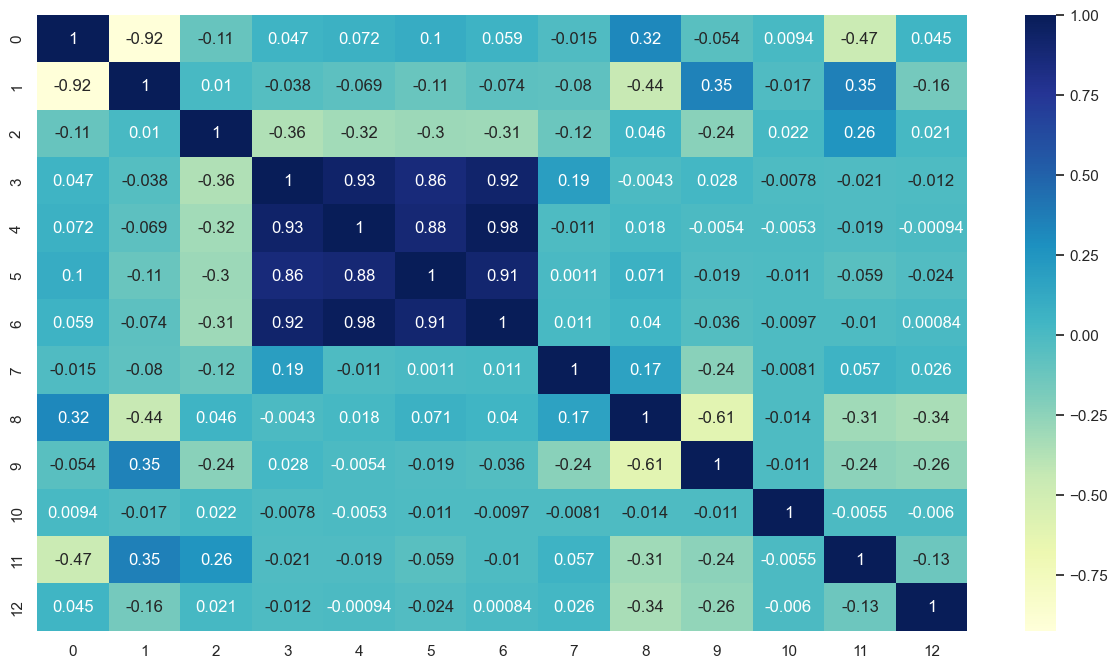

In [41]:
# Entrenar nuevamente el modelo para obtener mejores resultados
correlaciones = df.corr()

sb.set(rc={"figure.figsize":(15,8)})
sb.heatmap(correlaciones,annot=True,cmap="YlGnBu")
plt.show()